# Clustering 
1. Hierarchical clustering
2. K-means clustering
3. DBScanner clustering

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth #
from sklearn.neighbors import NearestNeighbors #
from sklearn.mixture import GaussianMixture #
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial.distance import pdist, squareform
from collections import Counter


In [2]:
df = pd.read_csv('Processed_Data.csv')

In [ ]:
df.head(5)

In [ ]:
cluster_features = ['vendor_count', 'is_chain', 'first_order', 'last_order', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']

print('cluster_features', cluster_features)

In [ ]:
print(df[cluster_features].dtypes)

With this we can confirm that all features features are numeric (`float64` and `int64`)

In [ ]:
print(df.shape)  

In [ ]:
print(cluster_features) 

### Hierarchical Clustering 

Linkage Matrix

In [8]:
linkage_matrix = linkage(df[cluster_features].to_numpy(), method='ward')

Dendrogram

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)

plt.axhline(y=4000, color='r', linestyle='--') 

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

Number of clusters

In [10]:
cluster_labels = fcluster(linkage_matrix, t=4000, criterion='distance')

In [ ]:
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())

##### 1. Dendrogram
The dendrogram was generated using the **Ward's Linkage** method, which minimizes the variation within clusters. 
- The red line represents the **cut-off height** defined at `t=4000`.
- This line determines the number of clusters by "cutting" the dendrogram.
- The branches below the red line correspond to the formed clusters.

##### 2. Clusters
**5 clusters** were identified, with the following sizes:

| Cluster | Number of Samples |
|---------|--------------------|
| 1       | 1080                |
| 2       | 2882             |
| 3       | 13865             |
| 4       | 5885             |
| 5       | 8163             |


### Cluster Analysis: 
The following variables were analyzed across clusters:
- `vendor_count`
- `is_chain`
- `first_order`
- `last_order`
- `engagement_duration`
- `tot_value_cui`
- `preferred_order_day`
- `preferred_order_hour`
- `age_category`

This analysis focuses on identifying patterns and differences in these variables among the clusters.

In [ ]:
other_columns = [
    'vendor_count', 'is_chain', 'first_order', 'last_order',
    'engagement_duration', 'tot_value_cui', 
    'preferred_order_day', 'preferred_order_hour', 'age_category' ]

other_analysis = cluster_analysis[other_columns]
print("Analysis of Other Variables by Cluster:")
print(other_analysis)

The following cuisine-related variables were analyzed across clusters:
- `CUI_American`
- `CUI_Asian`
- `CUI_Beverages`
- `CUI_Cafe`
- `CUI_Chicken Dishes`
- `CUI_Chinese`
- `CUI_Healthy`
- `CUI_Indian`
- `CUI_Italian`
- `CUI_Japanese`
- `CUI_Noodle Dishes`
- `CUI_OTHER`
- `CUI_Street Food / Snacks`
- `CUI_Thai`

In [ ]:
cuisine_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
    'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
    'CUI_Thai']

cuisine_analysis = cluster_analysis[cuisine_columns]
print("Cuisine Analysis by Cluster:")
print(cuisine_analysis)

#### Cluster Analysis Summary

| **Cluster** | **Vendor Count** | **Is Chain** | **First Order** | **Last Order** | **Engagement Duration** | **Total Value** | **Preferred Order Day** | **Preferred Order Hour** | **Age Category** | **Top Cuisines**                | **Conclusion**                                                                 |
|-------------|------------------|--------------|------------------|----------------|--------------------------|-----------------|--------------------------|--------------------------|------------------|----------------------------------|--------------------------------------------------------------------------------|
| **1**       | 9.01             | 9.37         | 9.53             | 82.30          | 72.77                   | 210.05          | 2.73                     | 10.56                    | 29.12           | Asian, American, Snacks         | High-spending, loyal customers, mostly aged around 29 years, with high engagement, preferring Asian cuisine, snacks, and morning orders. |
| **2**       | 5.91             | 5.74         | 12.46            | 80.56          | 68.10                   | 96.54           | 2.63                     | 10.10                    | 28.87           | Asian, American                 | Moderately spending customers, aged around 28 years, with steady engagement, preferring Asian and American cuisines and morning orders. |
| **3**       | 3.54             | 3.32         | 19.79            | 72.54          | 52.75                   | 34.48           | 2.54                     | 11.53                    | 28.54           | Asian, American                 | Low-spending, moderately engaged customers, aged around 28 years, with delayed first orders, preferring Asian cuisine and mid-morning orders. |
| **4**       | 1.66             | 1.16         | 66.83            | 74.95          | 8.11                    | 18.01           | 2.79                     | 11.71                    | 29.19           | Asian, American                 | Inactive customers, mostly aged around 29 years, with very low spending and engagement, preferring occasional Asian cuisine and late-morning orders. |
| **5**       | 1.62             | 1.25         | 23.34            | 32.05          | 8.71                    | 16.12           | 2.83                     | 11.87                    | 28.62           | Asian, American                 | New or disengaged customers, aged around 28 years, with minimal spending and low engagement, preferring Asian cuisine and late-morning orders. |



### 2. K-Means ###

### 3. DBSCAN (Density-based spatial clustering of applications with noise)

In [3]:
# Splitting feature names into groups
# Remember which metric_features we decided to keep?
metric_features = df.select_dtypes(include=['number']).columns.tolist()

In [4]:
print('metric_features:', metric_features)

metric_features: ['vendor_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


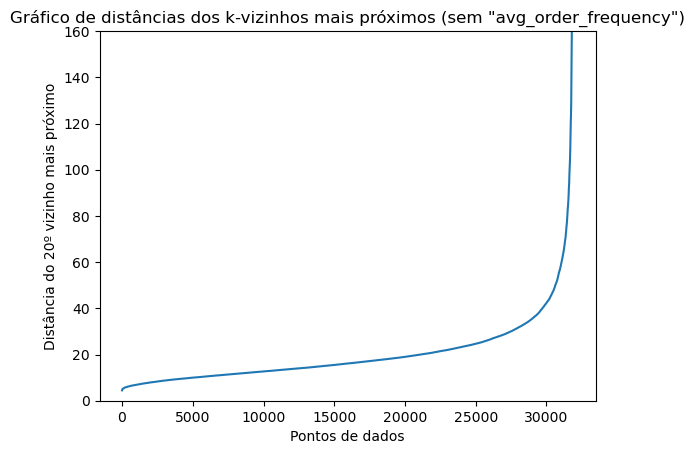

In [5]:
features_for_distance = [feature for feature in metric_features]

# Calcular as distâncias dos k-vizinhos mais próximos
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df[features_for_distance])
distances, _ = neigh.kneighbors(df[features_for_distance])

# Ordenar as distâncias
distances = np.sort(distances[:, -1])

# Plotar o gráfico das distâncias
plt.plot(distances)
plt.xlabel('Pontos de dados')
plt.ylabel('Distância do 20º vizinho mais próximo')
plt.title('Gráfico de distâncias dos k-vizinhos mais próximos (sem "avg_order_frequency")')

# Alterar os limites do eixo y para 0 a 160
plt.ylim(0, 160)

plt.show()


In [8]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=30, min_samples=40, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

#usei o eps=30 por causa do grafico
#usei min_samples=10 para dar mais clusters 
# deve ser 2xdim e deve ser mais ou menos isso (24 x 2 = 48) mas assim so da 2


Number of estimated clusters : 2


In [9]:
# Concatenating the labels to df
df_concat = pd.concat([df[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

,vendor_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,...,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,engagement_duration,tot_value_cui,preferred_order_day,preferred_order_hour,age_category,dbscan_labels
0,2.0,1.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,28.88,0,18,26,0
1,2.0,2.0,0.0,1.0,12.82,6.39,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,19.21,0,10,16,0
2,1.0,2.0,0.0,1.0,9.20,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,9.20,0,9,42,0
3,2.0,1.0,0.0,2.0,0.00,13.70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,31.56,1,11,26,0
4,2.0,0.0,0.0,2.0,14.57,40.87,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,55.44,1,8,26,0


In [10]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

,vendor_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,...,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,engagement_duration,tot_value_cui,preferred_order_day,preferred_order_hour,age_category,dbscan_labels
39,2.0,0.0,0.0,8.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,15.92,8,69.56,0,16,26,-1
55,5.0,1.0,0.0,13.0,0.00,56.16,0.00,0.00,0.0,0.00,...,0.00,0.00,24.56,0.00,13,80.72,0,11,16,-1
100,5.0,12.0,0.0,24.0,0.00,0.00,74.80,0.00,0.0,0.00,...,0.00,0.00,3.46,0.00,24,90.12,0,10,26,-1
104,7.0,12.0,0.0,25.0,0.00,0.00,27.09,2.23,0.0,58.94,...,0.00,3.04,0.00,0.00,25,96.93,0,12,26,-1
107,4.0,3.0,0.0,26.0,25.61,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,4.94,0.00,26,62.78,1,17,26,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30930,9.0,7.0,82.0,89.0,0.00,0.00,0.00,0.00,0.0,24.04,...,5.69,17.84,0.00,0.00,7,55.43,2,11,26,-1
31093,3.0,2.0,83.0,85.0,0.00,0.00,0.00,19.14,0.0,0.00,...,0.00,0.00,0.00,0.00,2,78.47,5,9,26,-1
31114,3.0,2.0,83.0,89.0,0.00,59.98,0.00,0.00,0.0,0.00,...,0.00,0.00,49.84,0.00,6,109.82,4,1,26,-1
31604,1.0,1.0,88.0,88.0,0.00,0.00,62.80,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0,62.80,3,7,26,-1


In [11]:
np.unique(dbscan_labels)


array([-1,  0])

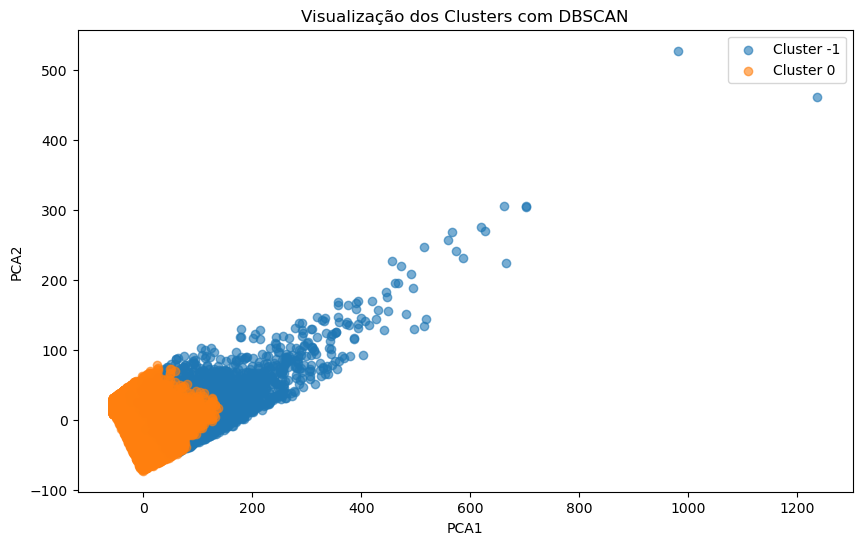

In [12]:
# Visualizar os clusters em um gráfico 2D
from sklearn.decomposition import PCA

# Reduzir os dados a 2 dimensões para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[features_for_clustering])

# Criar um DataFrame com as coordenadas PCA e os rótulos dos clusters
df_plot = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = dbscan_labels

# Plotar os clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(dbscan_labels):
    cluster_points = df_plot[df_plot['cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualização dos Clusters com DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [13]:
dbscan = DBSCAN(eps=30, min_samples=40, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df[metric_features])
Counter(dbscan_labels)

Counter({0: 28691, -1: 3184})

In [14]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df[dbscan_labels==-1].copy()

# New df without outliers and 'rcn'
df = df[dbscan_labels!=-1].copy()


In [15]:
df_out.shape, df.shape

((3184, 24), (28691, 24))

## Mean Shift Clustering

In [29]:
bandwidth = estimate_bandwidth(df[metric_features], quantile=0.3, random_state=1, n_jobs=-1)
bandwidth

57.5362677067515

In [30]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df[metric_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 1
